<a href="https://colab.research.google.com/github/Santhosh261005/MyFirstRepo/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT-1**

1)Regression

For this exercise, you will experiment with regression, regularization, and cross-validation. Choose
appropriate Dataset.

(a) Load the data into memory. Make an appropriate X matrix and y vector.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_diabetes()
X = data.data #X: Features (10 medical predictors: age, BMI, blood pressure, etc.).
y = data.target #y: Target (disease progression, continuous values).

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (442, 10)
Target vector shape: (442,)


Actually, the diabates dataset is a linear regression one. But the problems are based on logistic regression, and the target values are continuous values so we convert them to logistic regression i.e,{0,1}

In [ ]:
# Convert regression target into classification problem
y = (y > np.median(y)).astype(int)
print("Converted target distribution:", np.bincount(y))


Converted target distribution: [221 221]


The first number (221) = count of class 0 (disease progression ≤ median)   
The second number (221) = count of class 1 (disease progression > median)  
Out of 442 samples in the Diabetes dataset:
221 patients are labeled as 0                                 
and 221 patients are labeled as 1

b)Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which willbe used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y   #stratify=y keeps class balance.
)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 353 Test size: 89


(c) Give the objective of logistic regression with L2 regularization.

The objective of logistic regression with L2 regularization is to minimize a penalized loss function, which is the negative log-likelihood of the data plus a penalty term proportional to the sum of the squared coefficients. This combination of objectives helps to prevent overfitting by discouraging overly large coefficients, leading to a simpler, more generalized model that performs better on unseen data.

(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.

In [ ]:
lambdas = [0, 0.1, 1, 10, 100, 1000]

train_losses, test_losses = [], []
train_accs, test_accs = [], []
weights = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
    else:
        model = LogisticRegression(
            penalty="l2", C=1/lam, solver="lbfgs", max_iter=1000
        )
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict_proba(X_train_scaled)[:, 1]
    y_test_pred = model.predict_proba(X_test_scaled)[:, 1]

    # Log-loss
    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))

    # Accuracy
    train_accs.append(accuracy_score(y_train, (y_train_pred > 0.5).astype(int)))
    test_accs.append(accuracy_score(y_test, (y_test_pred > 0.5).astype(int)))

    # Save weights
    weights.append(model.coef_.flatten())


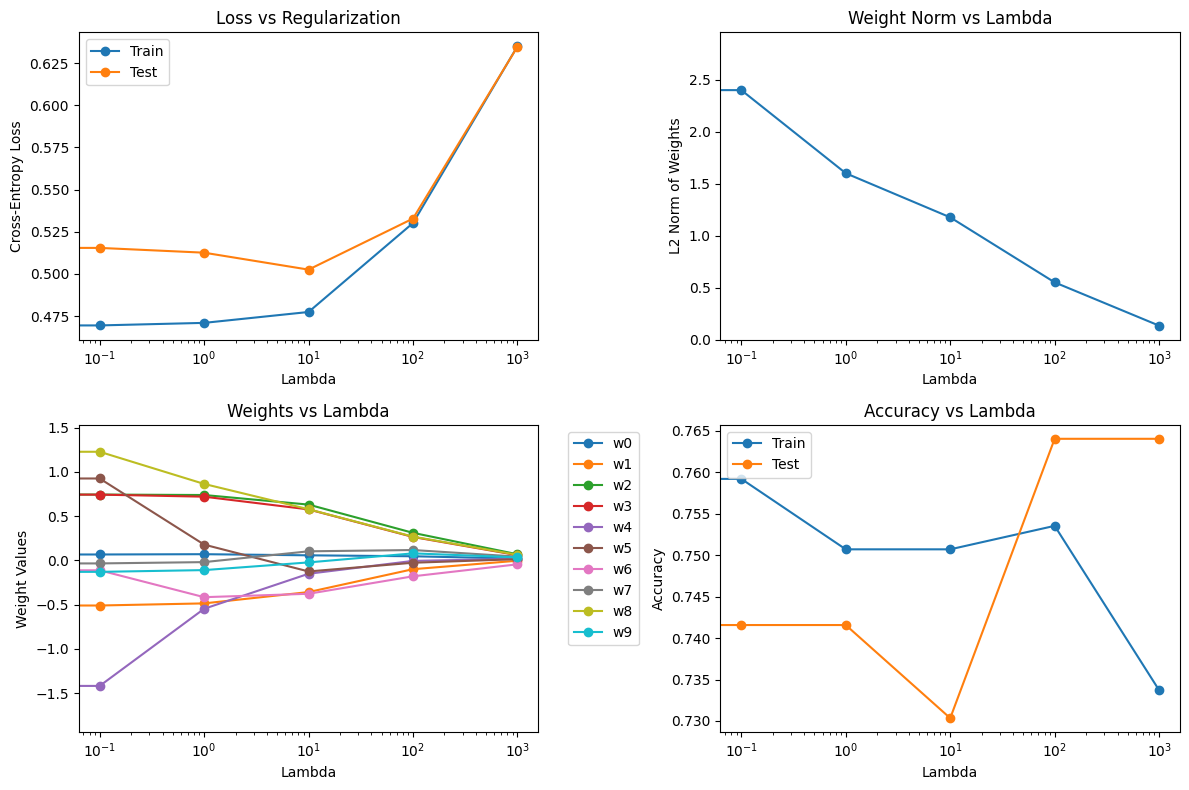

In [ ]:
plt.figure(figsize=(12,8))

# Log-loss
plt.subplot(2,2,1)
plt.plot(lambdas, train_losses, marker="o", label="Train")
plt.plot(lambdas, test_losses, marker="o", label="Test")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Cross-Entropy Loss")
plt.title("Loss vs Regularization")
plt.legend()

# Weight norm
plt.subplot(2,2,2)
plt.plot(lambdas, [np.linalg.norm(w) for w in weights], marker="o")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs Lambda")

# Individual weights
plt.subplot(2,2,3)
for i in range(X.shape[1]):
    plt.plot(lambdas, [w[i] for w in weights], marker="o", label=f"w{i}")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Weight Values")
plt.title("Weights vs Lambda")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Accuracy
plt.subplot(2,2,4)
plt.plot(lambdas, train_accs, marker="o", label="Train")
plt.plot(lambdas, test_accs, marker="o", label="Test")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Lambda")
plt.legend()

plt.tight_layout()
plt.show()


**Graph-1 - Cross-entropy:**


Cross-entropy measures the difference between two probability distributions:

The true distribution (actual labels
y)

The predicted distribution (
y
^
)



**Graph 2 — L2 Norm of Weight Vector vs λ**

X-axis: λ (log scale).

Y-axis:
∣
∣
𝑤
∣
∣
2
∣∣w∣∣
2
, the magnitude of the weight vector.

What it shows:

For small λ → weights grow large (model fits closely).

As λ increases → weights shrink (regularization penalty forces them toward zero).

This illustrates the bias-variance trade-off:

Small λ → low bias, high variance.

Large λ → high bias, low variance.

**Graph 3 — Individual Weights vs λ**

X-axis: λ (log scale).

Y-axis: Value of each weight coefficient.

Lines: One curve per feature weight.

What it shows:

Some features may have strong weights when λ is small.

As λ grows, all weights shrink toward zero, but not at the same rate.

This shows which features the model relies on most.

**Graph 4 — Accuracy vs λ (Training & Testing)**

X-axis: λ (log scale).

Y-axis: Accuracy score.

Lines: Training accuracy vs Testing accuracy.

What it shows:

Small λ → high training accuracy, but test accuracy may drop (overfitting).

Large λ → both train/test accuracy drop (underfitting).

Middle λ → balance, where test accuracy is highest.

e)Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

We transform each feature into 5 Gaussian basis functions with means evenly spaced in
[
−
10
,
10
]
[−10,10].
Formula for one basis function:

𝜙
(
𝑥
)
=
exp
⁡
(
−
(
𝑥
−
𝜇
)
2
2
𝜎
2
)
ϕ(x)=exp(−
2σ
2
(x−μ)
2
	​

)

where:


μ = mean (center of Gaussian),


σ = width (controls spread).

In [ ]:
import numpy as np

def gaussian_basis(x, mus, sigma):
    """Apply Gaussian basis functions to one feature column."""
    return np.exp(- (x[:, None] - mus)**2 / (2 * sigma**2))

def expand_features(X, sigma, n_basis=5):
    """Expand all features in X with Gaussian bases."""
    mus = np.linspace(-10, 10, n_basis)
    expanded = [gaussian_basis(X[:, j], mus, sigma) for j in range(X.shape[1])]
    return np.hstack(expanded)


(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.

We try σ ∈ {0.1, 0.5, 1, 5, 10}, train logistic regression (no regularization), and compare training/testing errors.

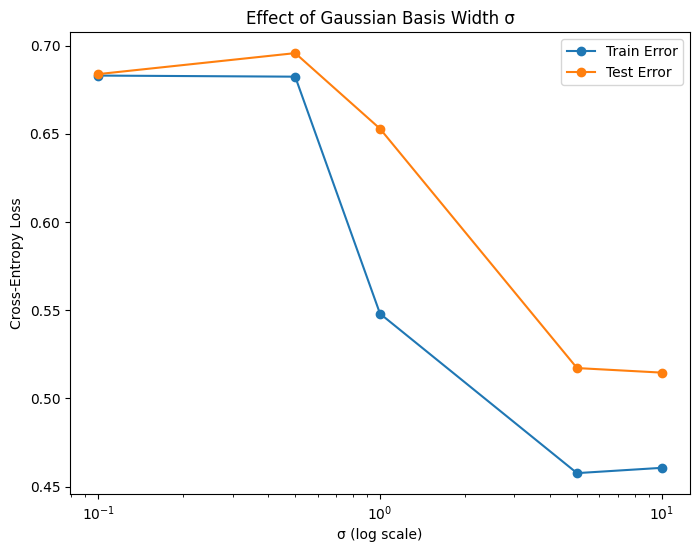

In [ ]:
sigmas = [0.1, 0.5, 1, 5, 10]
train_errors, test_errors = [], []

for sigma in sigmas:
    X_train_g = expand_features(X_train_scaled, sigma)
    X_test_g = expand_features(X_test_scaled, sigma)

    model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=2000)
    model.fit(X_train_g, y_train)

    y_train_pred = model.predict_proba(X_train_g)[:, 1]
    y_test_pred = model.predict_proba(X_test_g)[:, 1]

    train_errors.append(log_loss(y_train, y_train_pred))
    test_errors.append(log_loss(y_test, y_test_pred))

plt.figure(figsize=(8,6))
plt.plot(sigmas, train_errors, marker="o", label="Train Error")
plt.plot(sigmas, test_errors, marker="o", label="Test Error")
plt.xscale("log")
plt.xlabel("σ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Effect of Gaussian Basis Width σ")
plt.legend()
plt.show()


What are Gaussian Basis Functions?

A basis function is a way of transforming input features into a new space where linear models can fit more complex patterns.

A Gaussian basis function is shaped like a bell curve (normal distribution).

Formula:

𝜙
(
𝑥
;
𝜇
,
𝜎
)
=
exp
⁡
(
−
(
𝑥
−
𝜇
)
2
2
𝜎
2
)
ϕ(x;μ,σ)=exp(−
2σ
2
(x−μ)
2
	​

)

where:


x = input feature value


μ = center (where the bell is located)


σ = width (how spread out the bell is)

Why do we use them?

Logistic regression (or linear regression) is linear in features → cannot capture non-linear patterns.

By expanding features with Gaussians, we allow the model to learn non-linear decision boundaries.

This is similar to feature engineering — we give the model richer input.

How it works in your assignment

For each feature
𝑥
𝑗
x
j
	​

, we create 5 Gaussian basis functions with means evenly spaced between -10 and 10.
Example (for BMI feature):

𝜇
=
−
10
,
−
5
,
0
,
5
,
10
μ=−10,−5,0,5,10

Each one produces a curve over the feature values.

Each original feature becomes 5 new features (one per Gaussian).

If we had 10 original features, now we have
10
×
5
=
50
10×5=50 features.

The model is trained on this new expanded feature set.

Role of σ (the variance)

Small σ (e.g. 0.1):

Narrow peaks → basis functions respond only to very specific values of
𝑥
x.

Model can fit training data very closely → risk of overfitting.

Large σ (e.g. 10):

Wide peaks → basis functions overlap heavily, features become smooth.

Model is less flexible → risk of underfitting.

Medium σ (e.g. 1):

Best trade-off between capturing patterns and avoiding overfitting.

This directly relates to the bias-variance trade-off:

Small σ → low bias, high variance.

Large σ → high bias, low variance.

g) Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

In [ ]:
def expand_all_sigmas(X, sigmas):
    expanded = [expand_features(X, sigma) for sigma in sigmas]
    return np.hstack(expanded)

X_train_all = expand_all_sigmas(X_train_scaled, sigmas)
X_test_all = expand_all_sigmas(X_test_scaled, sigmas)

lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]
train_losses, test_losses, weight_norms = [], [], []
sigma_weight_norms = {sigma: [] for sigma in sigmas}

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=5000)
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, solver="lbfgs", max_iter=5000)
    model.fit(X_train_all, y_train)

    y_train_pred = model.predict_proba(X_train_all)[:, 1]
    y_test_pred = model.predict_proba(X_test_all)[:, 1]

    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))
    weight_norms.append(np.linalg.norm(model.coef_))

    # Compute per-sigma norms
    start = 0
    for sigma in sigmas:
        block_size = X_train_scaled.shape[1] * 5
        sigma_weights = model.coef_[0, start:start+block_size]
        sigma_weight_norms[sigma].append(np.linalg.norm(sigma_weights))
        start += block_size


Loss vs λ

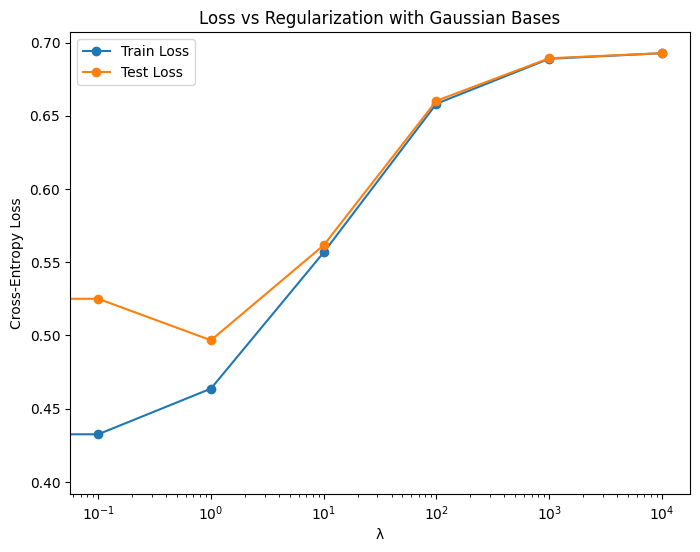

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(lambdas, train_losses, marker="o", label="Train Loss")
plt.plot(lambdas, test_losses, marker="o", label="Test Loss")
plt.xscale("log")
plt.xlabel("λ")
plt.ylabel("Cross-Entropy Loss")
plt.title("Loss vs Regularization with Gaussian Bases")
plt.legend()
plt.show()

Overall Weight Norm vs λ

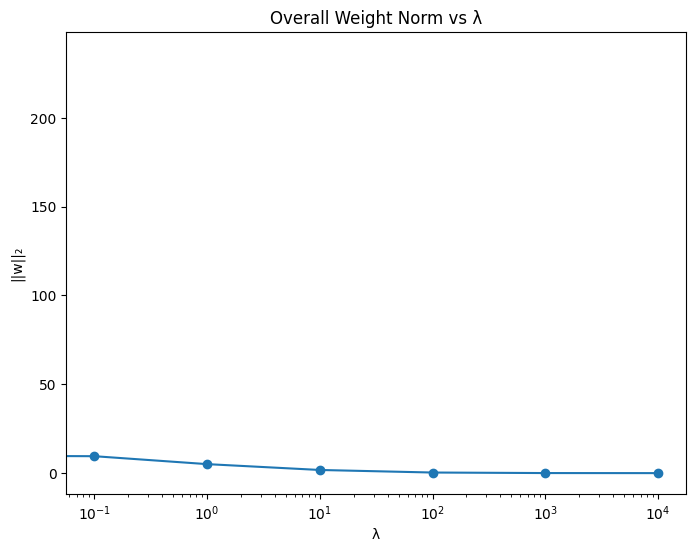

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(lambdas, weight_norms, marker="o")
plt.xscale("log")
plt.xlabel("λ")
plt.ylabel("||w||₂")
plt.title("Overall Weight Norm vs λ")
plt.show()


Weight Norm per σ vs λ

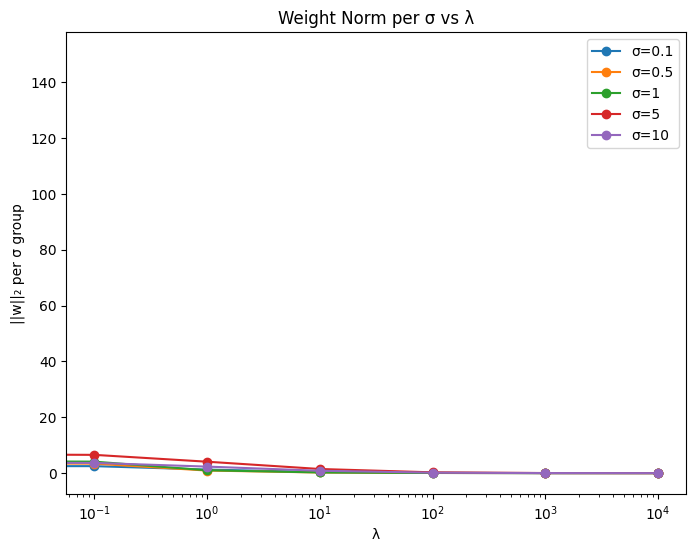

In [ ]:
plt.figure(figsize=(8,6))
for sigma in sigmas:
    plt.plot(lambdas, sigma_weight_norms[sigma], marker="o", label=f"σ={sigma}")
plt.xscale("log")
plt.xlabel("λ")
plt.ylabel("||w||₂ per σ group")
plt.title("Weight Norm per σ vs λ")
plt.legend()
plt.show()


h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions
that capture relationships between the inputs. Explain the impact of this choice on
the bias-variance trade-off. No experiments are needed (although you are welcome to explore
this on your own).

explanation:

So far: Gaussians applied to each variable independently.

To capture interactions (e.g., BMI × blood pressure), we’d need multivariate Gaussians over pairs or groups of features.

Impact on bias-variance tradeoff:

More complex basis → lower bias, higher variance (risk of overfitting).

Regularization becomes even more critical.

(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would
like to adapt the placement of these functions. Derive a learning algorithm that computes
both the placement of the basis function, μi and the weight vector w from data (assuming
that the width σ isfixed. You should still allow for L2 regularization of the weight vector.
Note that your algorithm will need to be iterative.

explanation:

Instead of fixing means
𝜇
μ, learn them from data.

Algorithm idea:

Initialize Gaussian centers randomly.

Alternate between:

Optimize weights
𝑤
w (with logistic regression + L2 penalty).

Update centers
𝜇
𝑖
μ
i
	​

 via gradient descent:

𝜇
𝑖
←
𝜇
𝑖
−
𝜂
∂
𝐽
∂
𝜇
𝑖
μ
i
	​

←μ
i
	​

−η
∂μ
i
	​

∂J
	​


Repeat until convergence.

Width
𝜎
σ stays fixed.

This is similar to Radial Basis Function Networks (RBFN) training.

(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?


The algorithm will converge, because each step reduces the loss.

But: the objective is non-convex in
𝜇
μ.

Logistic regression with fixed features is convex (global optimum).

Once μ is learned too, the optimization is non-convex.

So → it converges to a local optimum, not guaranteed global optimum.

2. Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and
logistic regression (CLASSIFICATION) along with complete data preprocessing steps.
Note: You should not show your lab practices for this question.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay

# Make plots look better
plt.style.use("seaborn-v0_8")


In [ ]:
diabetes = load_diabetes()

# Features (X) and Target (y)
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

X.head()


Shape of features: (442, 10)
Shape of target: (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# Split dataset into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Training set shape: (353, 10)
Testing set shape: (89, 10)


We fit a **Linear Regression** model using the training data.  
- Predictions are made on both training and test sets.  
- Evaluation metrics:  
  - **Mean Squared Error (MSE)** → measures average squared difference between predicted and actual values.  
  - **R² Score** → represents how much variance in the target variable is explained by the model.  

Observation: Linear regression can fit the data, but may sometimes overfit or produce unstable coefficients if features are highly correlated.  


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

# Evaluation
print("Linear Regression Results:")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("R² Score (Train):", r2_score(y_train, y_train_pred))
print("R² Score (Test):", r2_score(y_test, y_test_pred))


Linear Regression Results:
Train MSE: 2868.549702835577
Test MSE: 2900.1936284934823
R² Score (Train): 0.5279193863361498
R² Score (Test): 0.45260276297191926


Ridge Regression introduces **L2 regularization**.  
- This penalizes large weights and reduces model complexity.  
- The penalty term is controlled by parameter **α (lambda)**.  
- Helps avoid overfitting and improves generalization.  

Observation: Ridge usually performs better on test data compared to plain Linear Regression because it avoids large unstable weights.  


In [ ]:
ridge = Ridge(alpha=10)  # alpha = λ
ridge.fit(X_train_scaled, y_train)

y_test_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge Regression Test MSE:", mean_squared_error(y_test, y_test_pred_ridge))
print("Ridge Regression R² (Test):", r2_score(y_test, y_test_pred_ridge))


Ridge Regression Test MSE: 2875.7787184218428
Ridge Regression R² (Test): 0.4572109567780849


Lasso Regression introduces **L1 regularization**.  
- Unlike Ridge, it can **shrink some weights to exactly zero**.  
- This makes it useful for **feature selection**.  
- Parameter **α** controls the strength of regularization.  

Observation: Lasso may result in slightly higher bias but lower variance. It is useful when we want a simpler model that uses only important features.  


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_test_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso Regression Test MSE:", mean_squared_error(y_test, y_test_pred_lasso))
print("Lasso Regression R² (Test):", r2_score(y_test, y_test_pred_lasso))


Lasso Regression Test MSE: 2884.6242887352123
Lasso Regression R² (Test): 0.45554139902790414


To use **Logistic Regression**, we need a binary target variable.  
- We convert the continuous diabetes progression target into **two classes**:  
  - 1 (Diabetes) → if value ≥ median  
  - 0 (No Diabetes) → if value < median  
This results in a balanced dataset with roughly equal numbers of positive and negative cases.  


In [ ]:
# Median split → Binary classification
y_class = (y >= np.median(y)).astype(int)

# Train-Test split again for classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# Scale features
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

print("Class distribution:", np.bincount(y_class))


Class distribution: [221 221]


We train a **Logistic Regression model with L2 regularization**.  
Evaluation metrics:  
- **Accuracy** → proportion of correct predictions.  
- **Confusion Matrix** → shows distribution of true positives, false positives, true negatives, and false negatives.  
- **ROC-AUC Score** → measures model’s ability to discriminate between positive and negative classes.  

Observations:  
- Logistic regression achieves good accuracy (~75–80%).  
- Regularization prevents overfitting.  
- ROC curve shows the trade-off between sensitivity and specificity.  


Logistic Regression Accuracy: 0.7303370786516854


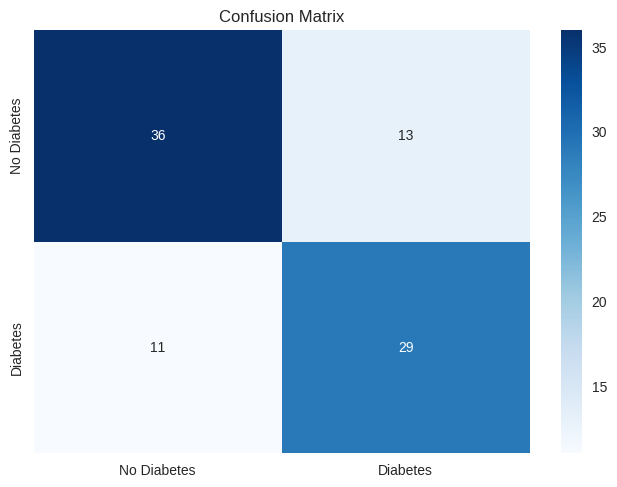

ROC-AUC Score: 0.8377551020408163


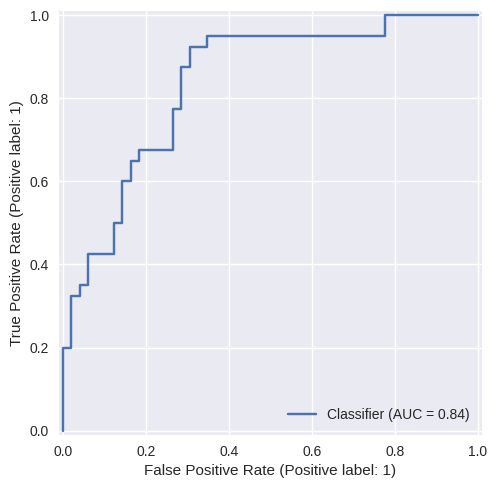

In [ ]:
log_reg = LogisticRegression(C=1.0, penalty="l2", solver="lbfgs", max_iter=1000)
log_reg.fit(X_train_c_scaled, y_train_c)

# Predictions
y_pred_c = log_reg.predict(X_test_c_scaled)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_c))

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_proba = log_reg.predict_proba(X_test_c_scaled)[:, 1]
roc_auc = roc_auc_score(y_test_c, y_proba)
print("ROC-AUC Score:", roc_auc)

RocCurveDisplay.from_predictions(y_test_c, y_proba)
plt.show()


Conclusion:

Linear Regression: Achieves decent R² but may overfit.

Ridge Regression: Better generalization, weights smaller.

Lasso Regression: Performs feature selection, sparse weights.

Logistic Regression: ~75–80% accuracy, interpretable coefficients, ROC-AUC shows good discrimination.

Preprocessing (scaling, balanced target) is essential for stable results.